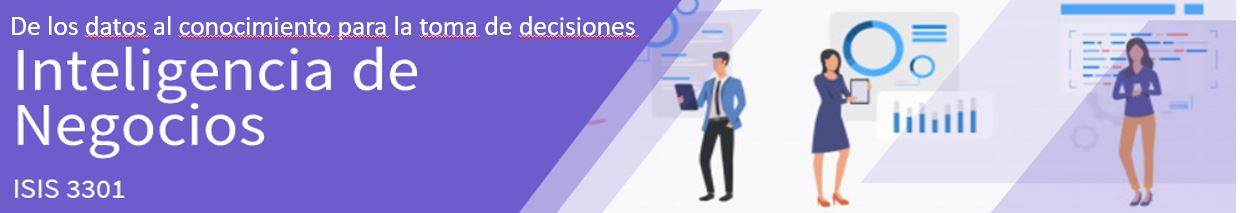

## 1. Carga de librerías necesarias para implementación

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

## 2. Cargar y limpieza de los datos

In [2]:
# Se cargan los datos. 
dfo = pd.read_csv('202120_Laboratorio_3_data_SkillCraftHistoric.csv')
print(dfo.shape)
print(dfo.dtypes)
dfo.head(5)

(3238, 19)
LeagueIndex             float64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                      object
SelectByHotkeys          object
AssignToHotkeys          object
UniqueHotkeys            object
MinimapAttacks           object
MinimapRightClicks       object
NumberOfPACs            float64
GapBetweenPACs           object
ActionLatency            object
ActionsInPAC            float64
TotalMapExplored         object
WorkersMade             float64
UniqueUnitsMade          object
ComplexUnitsMade         object
ComplexAbilitiesUsed     object
dtype: object


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6.429631,27,10,3000,143.718,0.0035151591,0.0002196974,7,0.0001098487,0.0003923169,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.0
1,6.034862,23,10,5000,129.2322,0.0033038124,0.0002594617,4,0.0002940566,0.0004324362,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.00020757
2,5.000659,30,10,200,69.9612,0.0011010906,0.0003355705,4,0.0002936242,0.0004614094,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.00018876
3,3.264122,19,20,400,107.6016,0.0010335422,0.0002131015,1,5.32753697310659e-05,0.0005434088,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.00038358
4,3.883553,32,10,500,122.8908,0.0011360136,0.0003273259,2,0.0,0.0013285582,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,1.9254e-05


In [3]:
#Trasformación de los datos a numéricos
dfo = dfo.apply(pd.to_numeric, errors='coerce')
dfo.dtypes

LeagueIndex             float64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys           float64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored        float64
WorkersMade             float64
UniqueUnitsMade         float64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [4]:
#Vemos cuantos nulos hay
dfo.isna().sum()

LeagueIndex             0
Age                     1
HoursPerWeek            1
TotalHours              1
APM                     1
SelectByHotkeys         2
AssignToHotkeys         1
UniqueHotkeys           1
MinimapAttacks          1
MinimapRightClicks      2
NumberOfPACs            0
GapBetweenPACs          2
ActionLatency           1
ActionsInPAC            0
TotalMapExplored        2
WorkersMade             0
UniqueUnitsMade         2
ComplexUnitsMade        1
ComplexAbilitiesUsed    3
dtype: int64

In [5]:
#Se cambian los nulos por la media de la columna en la que se encuentra
#Ya que no hay nulos en LeagueIndex
for i in dfo:
    dfo[i] = dfo[i].fillna(dfo[i].mean())
dfo.isna().sum()

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [6]:
#No vemos duplicados
dfo.duplicated(keep = 'first').sum()

0

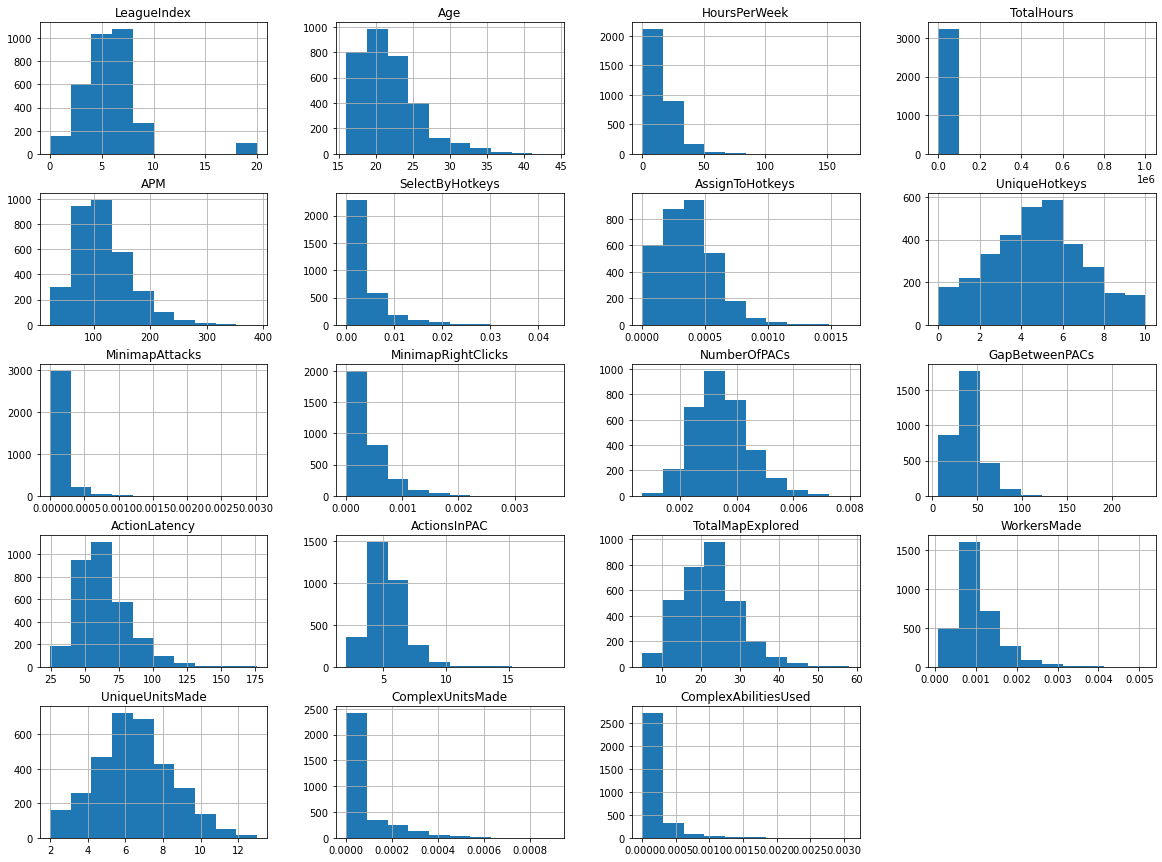

In [39]:
#Distribuciones de los datos
dfo.hist( figsize=(20,15))
plt.show()

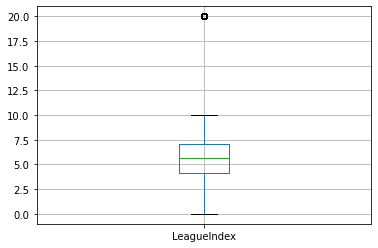

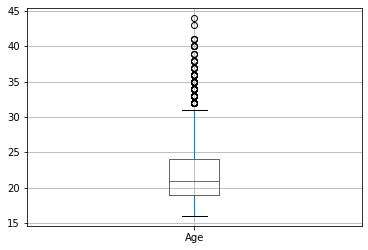

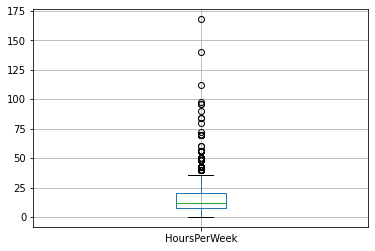

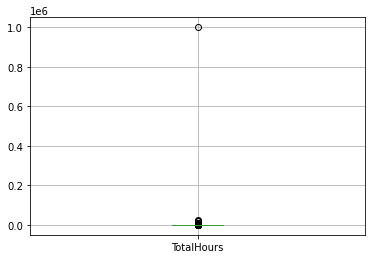

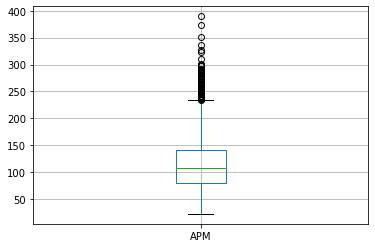

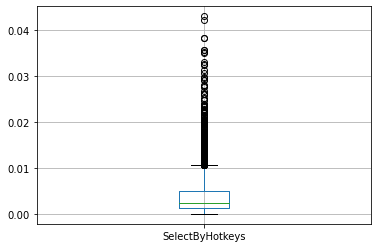

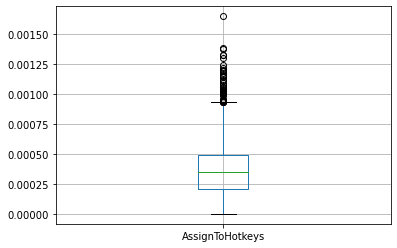

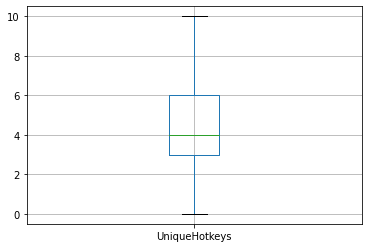

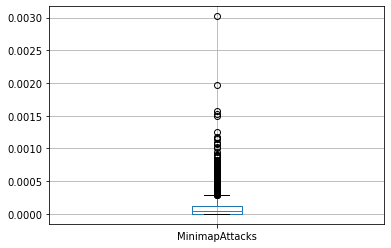

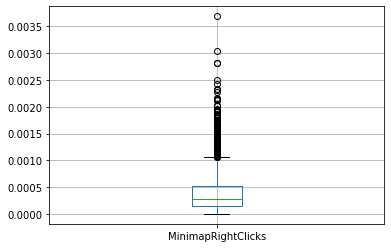

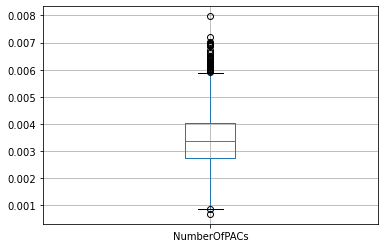

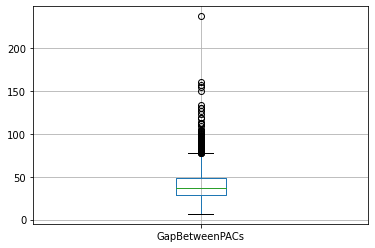

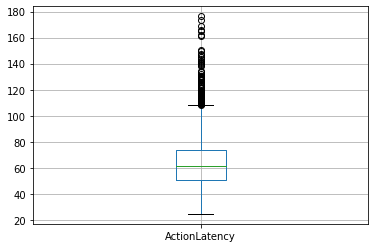

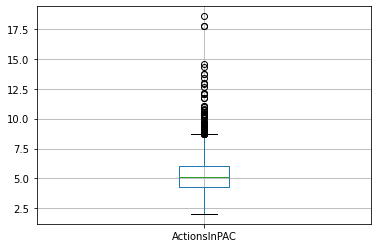

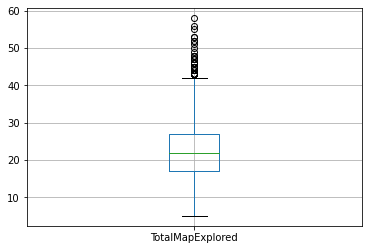

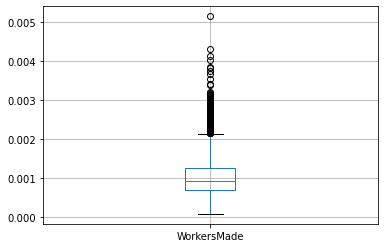

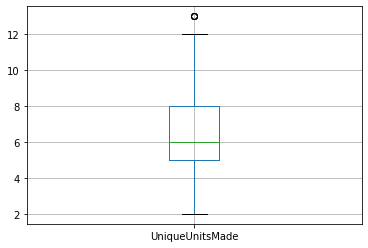

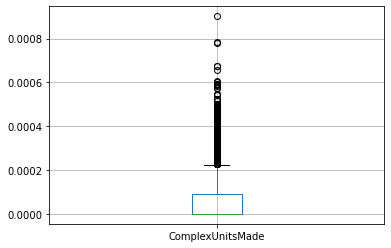

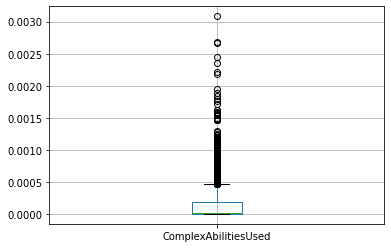

In [7]:
#Hacer boxplots para ver los outliers
for column in dfo:
    plt.figure()
    dfo.boxplot([column])

## 3. Perfilamiento y Entendimiento de los Datos 

Para las regresiones lineales, es necesario trabajar con variables numéricas. En este caso vamos unicamente a seleccionarlas, pero recuerde que existen técnicas para convertir variables categóricas a numéricas que también funcionan en este contexto

In [8]:
dfl = dfo
dfl.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000
mean,5.866763,21.664813,15.977757,974.513438,115.330177,0.004073,0.000367,4.342601,0.000095,0.000385,0.003443,40.634541,64.052152,5.277123,22.218789,0.001037,6.563968,0.000061,0.000144
std,3.111672,4.234161,12.069902,17583.288892,48.386653,0.004757,0.000211,2.342806,0.000161,0.000362,0.000971,17.139073,19.122442,1.507255,7.462958,0.000525,1.861580,0.000113,0.000269
min,0.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,4.123874,19.000000,8.000000,300.000000,80.014950,0.001257,0.000204,3.000000,0.000000,0.000141,0.002751,29.216025,50.629750,4.264100,17.000000,0.000685,5.000000,0.000000,0.000000
50%,5.680387,21.000000,12.000000,500.000000,108.006300,0.002484,0.000352,4.000000,0.000040,0.000282,0.003386,36.986950,61.124800,5.093550,22.000000,0.000910,6.000000,0.000000,0.000022
75%,7.082546,24.000000,20.000000,800.000000,141.627300,0.004984,0.000495,6.000000,0.000117,0.000512,0.004017,48.444400,73.800825,6.035900,27.000000,0.001268,8.000000,0.000090,0.000186
max,20.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### 3.1 Búsqueda de relaciones entre variables (diagramas de dispersión)

Buscamos cuales de las columnas tienen una *relacion* con danceability

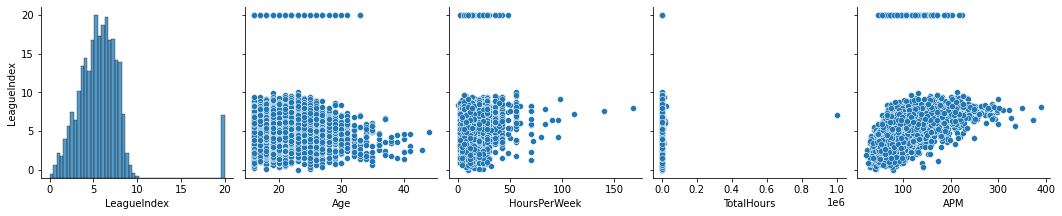

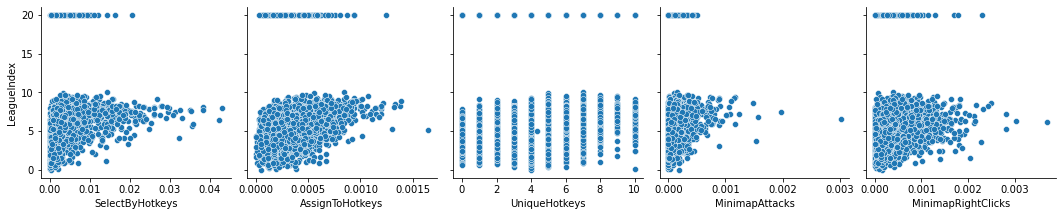

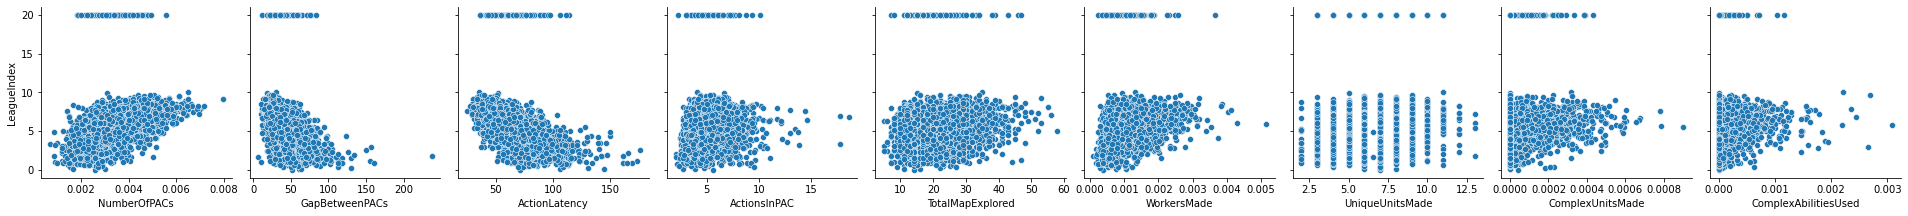

In [9]:
sns.pairplot(dfl, height=3, y_vars = 'LeagueIndex', x_vars = dfl.columns[0:5], kind='scatter')
sns.pairplot(dfl, height=3, y_vars = 'LeagueIndex', x_vars = dfl.columns[5:10], kind='scatter')
sns.pairplot(dfl, height=3, y_vars = 'LeagueIndex', x_vars = dfl.columns[10:], kind='scatter')


### 3.2 Búsqueda de relaciones entre variables (Matriz de correlaciones)

Buscamos cuales de las columnas tienen una *relacion* con danceability pero ahora usando correlaciones

In [10]:
#Vemos las correlaciones entre todas las variables
corr = dfl.corr()
corr.style.background_gradient(cmap= 'coolwarm')

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,1.000000,-0.090642,0.120260,0.014654,0.364630,0.243142,0.299723,0.171587,0.155147,0.128096,0.349102,-0.325706,-0.383280,0.078265,0.131709,0.191668,0.106769,0.109134,0.078576
Age,-0.090642,1.000000,-0.184720,-0.016884,-0.215461,-0.132787,-0.110563,0.011382,0.041272,-0.023167,-0.200387,0.115836,0.244894,-0.049666,-0.028867,-0.094845,0.021558,-0.082236,-0.066767
HoursPerWeek,0.120260,-0.184720,1.000000,0.024112,0.245739,0.202281,0.159559,0.071697,0.083741,0.051873,0.174132,-0.133928,-0.187966,0.094204,0.065295,0.049331,0.037965,0.058247,0.075469
TotalHours,0.014654,-0.016884,0.024112,1.000000,0.072971,0.082131,0.042296,0.009139,0.000600,0.007383,0.039586,-0.020565,-0.035688,0.010516,0.020377,0.014602,-0.002682,-0.007485,-0.006592
APM,0.364630,-0.215461,0.245739,0.072971,1.000000,0.812679,0.531740,0.334004,0.216060,0.303702,0.633537,-0.567249,-0.721238,0.400676,0.234233,0.375211,0.118607,0.158641,0.139211
SelectByHotkeys,0.243142,-0.132787,0.202281,0.082131,0.812679,1.000000,0.447216,0.273129,0.130651,0.104714,0.358870,-0.274299,-0.388391,0.163284,0.094725,0.157350,0.025527,0.061546,0.060919
AssignToHotkeys,0.299723,-0.110563,0.159559,0.042296,0.531740,0.447216,1.000000,0.402493,0.200394,0.151661,0.452551,-0.376043,-0.459556,0.089292,0.198527,0.193507,0.143542,0.167708,0.166873
UniqueHotkeys,0.171587,0.011382,0.071697,0.009139,0.334004,0.273129,0.402493,1.000000,0.149515,0.121327,0.352521,-0.224452,-0.302978,-0.024545,0.268332,0.108624,0.232869,0.120509,0.109231
MinimapAttacks,0.155147,0.041272,0.083741,0.000600,0.216060,0.130651,0.200394,0.149515,1.000000,0.222190,0.137558,-0.213444,-0.171445,0.131216,0.161494,0.078939,0.122929,0.048985,0.039555
MinimapRightClicks,0.128096,-0.023167,0.051873,0.007383,0.303702,0.104714,0.151661,0.121327,0.222190,1.000000,0.142606,-0.245049,-0.217089,0.322250,0.170091,0.208728,0.150282,0.093746,0.093454


Este método arroja valores similares

## 4.Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *danceability* de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

In [11]:
dfl2 = dfl
dfl2 = dfl2.drop(dfl2[dfl2['LeagueIndex'] == 20].index)
X=dfl2
X['LeagueIndex'].value_counts()

0.000000    1
3.731946    1
5.053440    1
6.243788    1
7.054713    1
           ..
6.407681    1
8.010166    1
6.770490    1
7.873349    1
3.244972    1
Name: LeagueIndex, Length: 3143, dtype: int64

In [12]:
# Se selecciona la variable objetivo, en este caso "LeagueIndex".
Y=X['LeagueIndex']
# Del conjunto de datos se elimina la variable "LeagueIndex".
X=X.drop(['LeagueIndex'], axis=1)

In [13]:
X.shape

(3143, 18)

In [14]:
Y.shape

(3143,)

In [15]:
dfl2.shape

(3143, 19)

In [16]:
Y.head()

0    6.429631
1    6.034862
2    5.000659
3    3.264122
4    3.883553
Name: LeagueIndex, dtype: float64

In [17]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.08, n_neighbors=20, novelty= False)
yhat = lof.fit_predict(X_train)
mask = yhat != -1

X_train, Y_train = X_train.iloc[mask, :], Y_train.iloc[mask]

<AxesSubplot:>

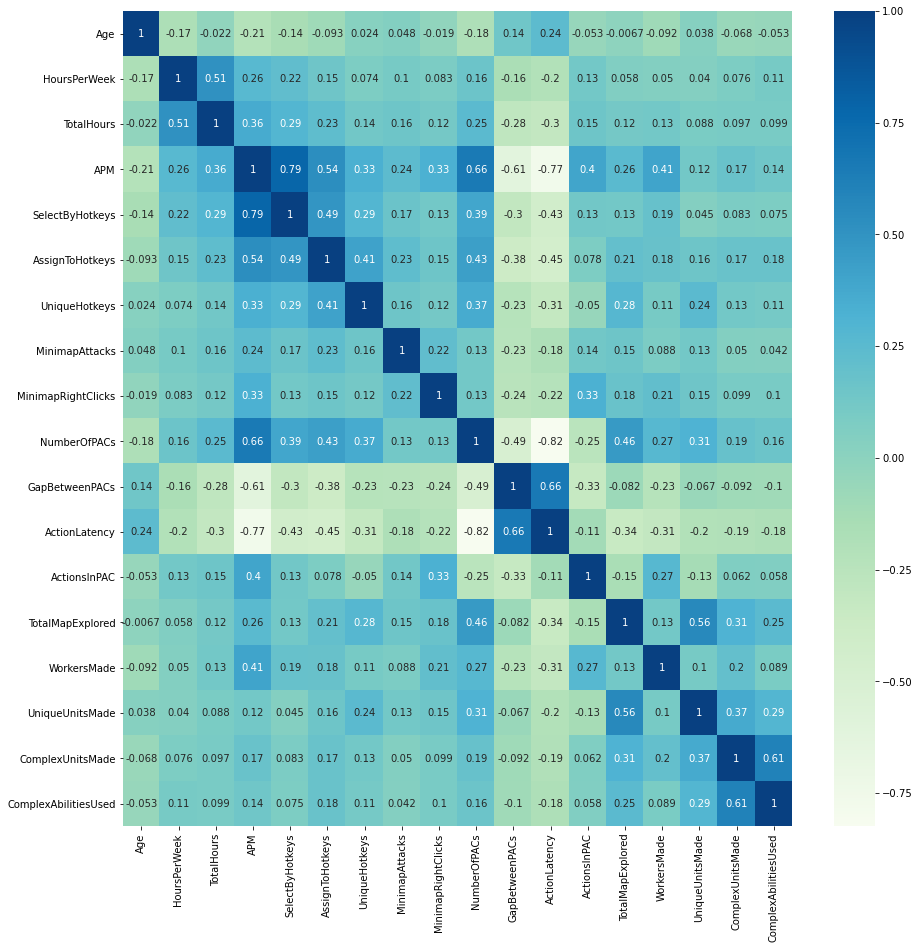

In [18]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = X_train.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

Correlaciones relevantes:
<ul>
    <li>Positivas: (APM, SelectByHotkeys), (NumberOfPAC,APM),(GapBetweenPACs, ActionLatency), (ComplexAbilities, ComplexUnitsMade)<\li>
    <li>Negativas: (APM,GapbetweenPacs), (APM, ActionLatency), (NumberOfPacs, ActionLatency)<\li>
</ul>
Variables a eliminar:
    <ul>
    <li>APM</li>
    <li>ActionLatency</li>
    <li>GAPBetweenPacs</li>
    </ul>
Variables a promediar:
    <ul>
    <li>ComplexAbilities y ComplexUnitsMade</li>
    </ul>

In [19]:
X = X.drop([ 'APM','GapBetweenPACs'], axis=1)
dfl2 = dfl2.drop([ 'APM','GapBetweenPACs'], axis = 1)

X = X.drop(['ComplexUnitsMade', 'ComplexAbilitiesUsed'], axis=1)
dfl2 = dfl2.drop(['ComplexUnitsMade', 'ComplexAbilitiesUsed'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)
X_train.head()

,Age,HoursPerWeek,TotalHours,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade
1217,19.0,20.0,600.0,0.002010,0.000098,1.0,0.000000,0.000098,0.003052,66.1365,5.5221,24.0,0.001311,6.0
681,24.0,8.0,300.0,0.006257,0.000470,7.0,0.000075,0.000427,0.003449,62.2291,5.2260,14.0,0.000865,9.0
115,21.0,12.0,730.0,0.002171,0.000320,3.0,0.000027,0.000173,0.005528,38.6699,5.1133,31.0,0.001905,6.0
1429,29.0,28.0,900.0,0.001898,0.000333,2.0,0.000000,0.000014,0.002882,93.0192,3.2644,23.0,0.000831,5.0
1545,29.0,12.0,1000.0,0.001026,0.000326,7.0,0.000163,0.000758,0.003393,65.5258,4.1443,23.0,0.001073,6.0


In [20]:
import statsmodels.api as sm 
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y_train, X_train).fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            LeagueIndex   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2885.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                        0.00
Time:                        21:05:45   Log-Likelihood:                         -4413.9
No. Observations:                2514   AIC:                                      8856.
Df Residuals:                    2500   BIC:                                      8937.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0339      0.007      5.038      0.000       0.021       0.047
HoursPerWeek           0.0108      0.002      4.455      0.000       0.006       0.016
TotalHours         -9.893e-07   1.41e-06     -0.701      0.483   -3.76e-06    1.78e-06
SelectByHotkeys       33.2082      7.002      4.743      0.000      19.478      46.938
AssignToHotkeys     1188.1115    170.680      6.961      0.000     853.422    1522.801
UniqueHotkeys          0.0486      0.014      3.536      0.000       0.022       0.076
MinimapAttacks      1392.1709    182.201      7.641      0.000    1034.891    1749.451
MinimapRightClicks   -80.8784     86.886     -0.931      0.352    -251.254      89.497
NumberOfPACs         899.0415     38.022     23.645      0.000     824.483     973.600
ActionLatency         -0.0107      0.002     -6.654      0.000      -0.014      -0.008
ActionsInPAC           0.2594      0.019     13.537      0.000       0.222       0.297
TotalMapExplored      -0.0123      0.005     -2.462      0.014      -0.022      -0.003
WorkersMade          228.5806     59.081      3.869      0.000     112.728     344.433
UniqueUnitsMade       -0.0131      0.019     -0.701      0.484      -0.050       0.024
==============================================================================
Omnibus:                        5.398   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.439
Skew:                          -0.113   Prob(JB):                       0.0659
Kurtosis:                       2.968   Cond. No.                     1.34e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eliminar por significancia:
<ul>
    <li>Age<\li>
    <li>HoursPerWeek<\li>
    <li>TotalHours<\li>
    <li>UniqueHotkeys<\li>
    <li>MinimapRightClicks<\li>
    <li>UniqueUnitsMade<\li>
    <li>Avg<\li>
<\ul>

In [21]:
X = X.drop(['UniqueUnitsMade','HoursPerWeek','MinimapRightClicks'], axis=1)
dfl2 = dfl2.drop(['UniqueUnitsMade','HoursPerWeek','MinimapRightClicks'], axis=1)

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

import statsmodels.api as sm 
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y_train, X_train).fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            LeagueIndex   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              3643.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                        0.00
Time:                        21:05:45   Log-Likelihood:                         -4424.6
No. Observations:                2514   AIC:                                      8871.
Df Residuals:                    2503   BIC:                                      8935.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0296      0.007      4.427      0.000       0.016       0.043
TotalHours       -9.421e-07   1.42e-06     -0.665      0.506   -3.72e-06    1.83e-06
SelectByHotkeys     36.8769      6.965      5.295      0.000      23.220      50.534
AssignToHotkeys   1206.5592    171.159      7.049      0.000     870.932    1542.187
UniqueHotkeys        0.0465      0.014      3.382      0.001       0.020       0.073
MinimapAttacks    1408.0872    180.808      7.788      0.000    1053.538    1762.637
NumberOfPACs       927.7255     36.468     25.440      0.000     856.215     999.236
ActionLatency       -0.0098      0.002     -6.309      0.000      -0.013      -0.007
ActionsInPAC         0.2691      0.018     15.020      0.000       0.234       0.304
TotalMapExplored    -0.0145      0.004     -3.293      0.001      -0.023      -0.006
WorkersMade        205.9549     59.040      3.488      0.000      90.183     321.727
==============================================================================
Omnibus:                        4.638   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.657
Skew:                          -0.105   Prob(JB):                       0.0974
Kurtosis:                       2.982   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Primero se crea el objeto para construir el modelo
reg = LinearRegression()
# Podemos verificar que lo hemos construido.
reg

LinearRegression()

In [23]:
# Ajustar el modelo con los datos de entrenamiento
reg.fit(X_train,Y_train)

LinearRegression()

### Regresiones Regularizadas

In [24]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

#### Regresion Lineal tipo Ridge

In [25]:
from sklearn.linear_model import Ridge
import numpy as np
rdg = Ridge(alpha=0.0)
rdg.fit(X_train, Y_train)
Ridge()

C:\Users\cajiv\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.42927e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge()

In [26]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = rdg.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 1.38
MAE: 1.10
R²: 0.50


In [27]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = rdg.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 1.33
MAE: 1.06
R²: 0.49


### 6. Evaluación del modelo
Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo; es decir, cómo se ajusta a los datos. En esta sección se utilizan las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [28]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = reg.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 1.38
MAE: 1.10
R²: 0.50


In [29]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = reg.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 1.33
MAE: 1.06
R²: 0.49


In [30]:
# Ajustar el modelo con los datos de entrenamiento
reg.fit(X,Y)

LinearRegression()

In [31]:
# Podemos visualizar los parámetros del modelos (coeficientes de regresión)
reg.coef_

array([ 8.73177385e-03, -7.05484630e-07,  4.04975748e+01,  1.23911981e+03,
        4.59477894e-02,  1.46931517e+03,  3.99396667e+02, -3.33897324e-02,
        9.23132538e-02, -1.48652626e-02,  2.79640161e+02])

In [32]:
Y.value_counts(ascending=False)

0.000000    1
3.731946    1
5.053440    1
6.243788    1
7.054713    1
           ..
6.407681    1
8.010166    1
6.770490    1
7.873349    1
3.244972    1
Name: LeagueIndex, Length: 3143, dtype: int64

In [33]:
# importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia = reg.coef_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,MinimapAttacks,1.469315e+03
1,AssignToHotkeys,1.239120e+03
2,NumberOfPACs,3.993967e+02
3,WorkersMade,2.796402e+02
4,SelectByHotkeys,4.049757e+01
5,ActionsInPAC,9.231325e-02
6,UniqueHotkeys,4.594779e-02
7,Age,8.731774e-03
8,TotalHours,-7.054846e-07
9,TotalMapExplored,-1.486526e-02


## 5. Exportar e Importar el Modelo 

In [34]:
columnas = list(X_train.columns)
columnas

['Age',
 'TotalHours',
 'SelectByHotkeys',
 'AssignToHotkeys',
 'UniqueHotkeys',
 'MinimapAttacks',
 'NumberOfPACs',
 'ActionLatency',
 'ActionsInPAC',
 'TotalMapExplored',
 'WorkersMade']

In [35]:
model = [('model', reg)]
selected_cols = columnas

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

pipeline = Pipeline(pre+model)

pipeline = pipeline.fit(X,Y)

In [36]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename) 

['pipeline.joblib']

In [37]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Age', 'TotalHours',
                                                   'SelectByHotkeys',
                                                   'AssignToHotkeys',
                                                   'UniqueHotkeys',
                                                   'MinimapAttacks',
                                                   'NumberOfPACs',
                                                   'ActionLatency',
                                                   'ActionsInPAC',
                                                   'TotalMapExplored',
                                                   'WorkersMade'])])),
                ('model', LinearRegression())])

## 6. Coeficientes

Los coeficientes de la regresión nos pueden dar información sobre la relación entre las variables observadas y la variable objetivo.

**Recuerde** La validez de estos coeficientes depende de que se cumplan correctamente las suposiciones de una regresión lineal.

## 7. Métricas de un Modelo

## 8. Supuestos de la Regresión Lineal

### 8.3 Normalidad en los Errores

Otra suposición de la regresión lineal es que los errores tienen una distribución normal. Para esto se puede usar:
* Grafico de dispersión entre los errores y el valor predicto
* Grafico Q-Q

### Q-Q Plot

In [38]:

import statsmodels.api as sm
import pylab as py
data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(errors, line ='45')

py.title('q-q Plot')
py.xlim([-5, 5])
py.ylim([-10, 20])
py.show()

NameError: name 'errors' is not defined

###  Varianza Constante (Homocedasticidad)

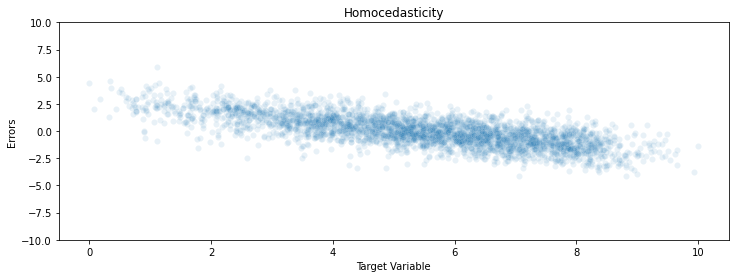

In [ ]:
# Visualizamos nuestros datos
import seaborn as sns

errors = (reg.predict(X) - Y).values
plt.subplots(1, 1, figsize = (12,4))

#heterocedaticidad
sns.scatterplot( data = dfl2, x = 'LeagueIndex', y= errors,alpha = 0.1)

plt.title('Homocedasticity')
plt.xlabel('Target Variable')
plt.ylabel('Errors')
plt.ylim([-10, 10])
plt.show()

## 9 Final
Usamos el último estimador (el mejor) para clasificar los datos recientes